<a href="https://colab.research.google.com/github/Glitch1441/ncmpcpp-with-cover-art/blob/master/RVRT_demo_on_Video_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RVRT Online Demo on Video Restoration

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2205.0000)
[![GitHub Stars](https://img.shields.io/github/stars/JingyunLiang/RVRT?style=social)](https://github.com/JingyunLiang/VRT)
[![download](https://img.shields.io/github/downloads/JingyunLiang/RVRT/total.svg)](https://github.com/JingyunLiang/VRT/releases)
![visitors](https://visitor-badge.glitch.me/badge?page_id=jingyunliang/RVRT)

This is a **RVRT online demo on Video Restoration** of our paper [''Recurrent Video Restoration Transformer with Guided Deformable Attention''](https://arxiv.org/abs/2205.00000). 

VRT ahcieves state-of-the-art performance with balanced model size, testing memory, and runtime in
- video SR (REDS, Vimeo90K, Vid4 and UDM10)
- video deblurring (GoPro, DVD and REDS)
- video denoising (DAVIS and Set8)

<img src="https://raw.githubusercontent.com/JingyunLiang/RVRT/main/assets/vsr_visual.jpg" width="100%">
<img src="https://raw.githubusercontent.com/JingyunLiang/RVRT/main/assets/vdb_visual.jpg" width="100%">
<img src="https://raw.githubusercontent.com/JingyunLiang/RVRT/main/assets/vdn_visual.jpg" width="100%">



# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU
* Broswer != Firefox (cannot upload images in step 2)

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
!rm -r RVRT
# Clone RVRT
!git clone https://github.com/JingyunLiang/RVRT.git
%cd RVRT
!pip install -r requirements.txt 

rm: cannot remove 'RVRT': No such file or directory
Cloning into 'RVRT'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 45 (delta 3), reused 44 (delta 2), pack-reused 0
Unpacking objects: 100% (45/45), done.
/content/RVRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 548 kB 21.5 MB/s 
     |████████████████████████████████| 163 kB 75.6 MB/s 


# 2. Upload Images

Upload the images to be processed by RVRT

In [ ]:
import os
import glob
from google.colab import files
import shutil
print(' Note1: You can upload a single video/ video frames as a batch. \n Note2: If you just to want to replicate the results in the paper, you can skip this step (we have enabled automatic download in the code).\n Note3: You may need Chrome to enable file uploading!\n Note4: Our model is trained on simple synthetic videos (e.g., bicubic). It may not perform well on real-world videos.\n')
input_folder = None

# upload images
!rm -r testsets/*
!rm -r results/*
os.mkdir('testsets/uploaded')
os.mkdir('testsets/uploaded/000')
uploaded = files.upload()
for filename in uploaded.keys():
  is_image = (filename.split('.')[-1].lower() in ['png','jpeg','jpg','tiff','bmp','tif',])
  input_folder = 'testsets/uploaded/000' if is_image else 'testsets/uploaded'
  dst_path = os.path.join(input_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
  
  if not is_image: # image or video
    print(f'extracting the video as frames to {input_folder}/000')
    os.system(f'ffmpeg -i testsets/uploaded/{filename} -qscale:v 1 -qmin 1 -qmax 1 -vsync 0  {input_folder}/000/frame%08d.png')
    os.remove(f'testsets/uploaded/{filename}')
    
!ls testsets/uploaded/000

 Note1: You can upload a single video/ video frames as a batch. 
 Note2: If you just to want to replicate the results in the paper, you can skip this step (we have enabled automatic download in the code).
 Note3: You may need Chrome to enable file uploading!
 Note4: Our model is trained on simple synthetic videos (e.g., bicubic). It may not perform well on real-world videos.

rm: cannot remove 'results/*': No such file or directory


# 3. Inference


In [ ]:
# Testing arguments
# --task: 001_RVRT_videosr_bi_REDS_30frames
#         002_RVRT_videosr_bi_Vimeo_14frames
#         003_RVRT_videosr_bd_Vimeo_14frames
#         004_RVRT_videodeblurring_DVD_16frames
#         005_RVRT_videodeblurring_GoPro_16frames
#         006_RVRT_videodenoising_DAVIS_16frames
# --folder_lq: path to low-quality videos. If you have uploaded your own video, it will use yours. 
#              Otherwise, it will automatically download benchmark datasets and test on them.
# --folder_gt: path to ground-truth videos. No use for your own video. Only support benchmark datasets.
# --tile: temporal, height and width testing sizes. For example, [100,128,128] means testing the video as 100x128x128 video clips. 
#         Reduce it if out-of-memory (at the expense of lower performance).
# --tile_overlap: tile overlapping size. No need to modify it.


##                                                ### Benchmak testing  ###
## Note: Due to Colab GPU memory limitation, we use smaller --tile here, which may lead to different performance from the paper. 
## Please refer to https://github.com/JingyunLiang/RVRT#quick-testing for official arguments.)

# 001, video sr trained on REDS, tested on REDS4
!python main_test_rvrt.py --task 001_RVRT_videosr_bi_REDS_30frames --folder_lq testsets/REDS4/sharp_bicubic --folder_gt testsets/REDS4/GT --tile 30 64 64 --tile_overlap 2 20 20 --num_workers 2 --save_result

# # 002, video sr trained on Vimeo (bicubic), tested on Vid4 and Vimeo
# !python main_test_rvrt.py --task 002_RVRT_videosr_bi_Vimeo_14frames --folder_lq testsets/Vid4/BIx4 --folder_gt testsets/Vid4/GT --tile 0 0 0 --tile_overlap 2 20 20 --num_workers 2 --save_result
# !python main_test_rvrt.py --task 002_RVRT_videosr_bi_Vimeo_14frames --folder_lq testsets/vimeo90k/vimeo_septuplet_matlabLRx4/sequences --folder_gt testsets/vimeo90k/vimeo_septuplet/sequences --tile 0 0 0 --tile_overlap 0 20 20 --num_workers 2 --save_result

# # 003, video sr trained on Vimeo (blur-downsampling), tested on Vid4, UDM10 and Vimeo
# !python main_test_rvrt.py --task 003_RVRT_videosr_bd_Vimeo_14frames --folder_lq testsets/Vid4/BDx4 --folder_gt testsets/Vid4/GT --tile 0 0 0 --tile_overlap 2 20 20 --num_workers 2 --save_result
# !python main_test_rvrt.py --task 003_RVRT_videosr_bd_Vimeo_14frames --folder_lq testsets/UDM10/BDx4 --folder_gt testsets/UDM10/GT --tile 0 0 0 --tile_overlap 2 20 20 --num_workers 2 --save_result
# !python main_test_rvrt.py --task 003_RVRT_videosr_bd_Vimeo_14frames --folder_lq testsets/vimeo90k/vimeo_septuplet_BDLRx4/sequences --folder_gt testsets/vimeo90k/vimeo_septuplet/sequences --tile 0 0 0 --tile_overlap 0 20 20 --num_workers 2 --save_result

# # 004, video deblurring trained and tested on DVD
# !python main_test_rvrt.py --task 004_RVRT_videodeblurring_DVD_16frames --folder_lq testsets/DVD10/test_GT_blurred --folder_gt testsets/DVD10/test_GT --tile 0 256 256 --tile_overlap 2 20 20 --num_workers 2 --save_result

# # 005, video deblurring trained and tested on GoPro
# !python main_test_rvrt.py --task 005_RVRT_videodeblurring_GoPro_16frames --folder_lq testsets/GoPro11/test_GT_blurred --folder_gt testsets/GoPro11/test_GT --tile 0 256 256 --tile_overlap 2 20 20 --num_workers 2 --save_result

# # 006, video denoising trained on DAVIS (noise level 0-50) and tested on Set8 and DAVIS
# !python main_test_rvrt.py --task 006_RVRT_videodenoising_DAVIS_16frames --sigma 50 --folder_lq testsets/Set8 --folder_gt testsets/Set8 --tile 0 256 256 --tile_overlap 2 20 20 --num_workers 2 --save_result
# !python main_test_rvrt.py --task 006_RVRT_videodenoising_DAVIS_16frames --sigma 50  --folder_lq testsets/DAVIS-test --folder_gt testsets/DAVIS-test --tile 0 256 256 --tile_overlap 2 20 20 --num_workers 2 --save_result


##                                       ### test your own video (no ground-truth) ###
# !python main_test_rvrt.py --task 001_RVRT_videosr_bi_REDS_30frames --folder_lq testsets/uploaded --tile 0 128 128 --tile_overlap 2 20 20 --num_workers 2 --save_result

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
loading model from ./model_zoo/rvrt/model_zoo/rvrt/001_RVRT_videosr_bi_REDS_30frames.pth
using dataset from testsets/REDS4/sharp_bicubic
tcmalloc: large alloc 1105920000 bytes == 0xddafc000 @  0x7fa0d04dab6b 0x7fa0d04fa379 0x7fa04c4e3d57 0x7fa04c4d1bc3 0x7fa0763dc6af 0x7fa0763dd020 0x7fa0763dd074 0x7fa0763dd1bf 0x7fa07716482b 0x7fa0771c7d42 0x7fa076907e37 0x7fa07716d89e 0x7fa07716d923 0x7fa076c7e565 0x7fa07691a531 0x7fa0772b31a3 0x7fa076d8585c 0x7fa0782a4f19 0x7fa0782a5416 0x7fa076dd7132 0x7fa09e1c3563 0x58ed05 0x51babb 0x5b4a3e 0x58f49e 0x51b221 0x4ba70a 0x538534 0x4e6e19 0x517c77 0x5b4a3e
tcmalloc: large alloc 1105920000 bytes == 0xddafc000 @  0x7fa0d04dab6b 0x7fa0d04fa379 0x7f

# 4. Visualization

 Note: Due to Colab GPU memory limitation, we use smaller --tile here, which may lead to different performance from the paper. 
 Please refer to https://github.com/JingyunLiang/RVRT#quick-testing for official arguments.



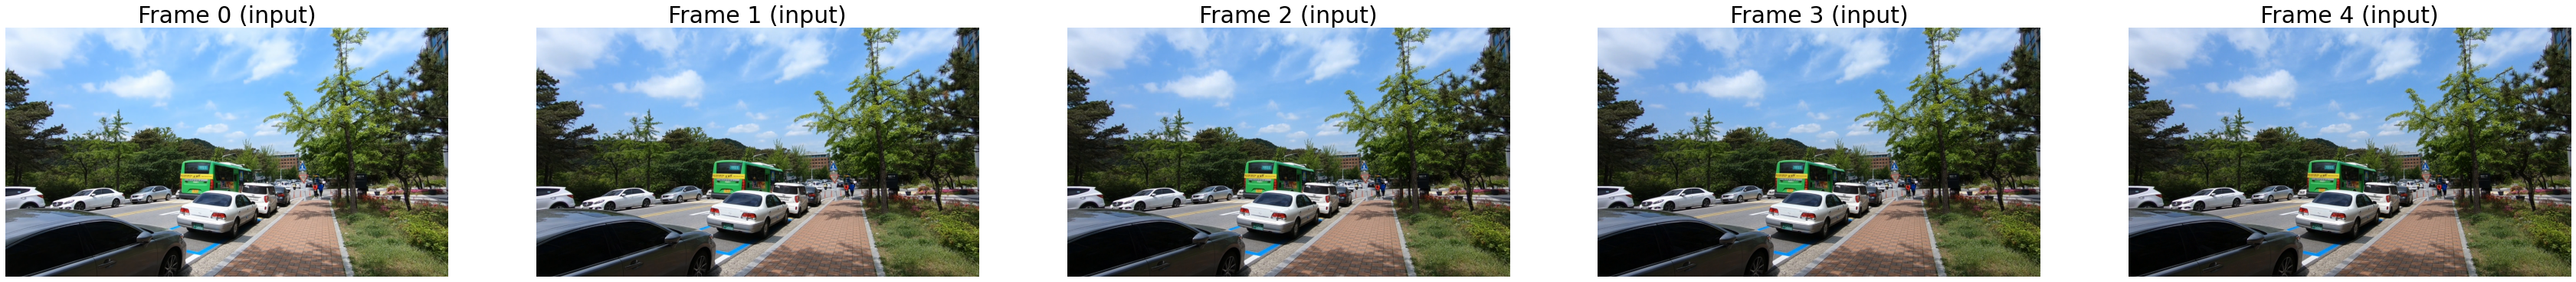

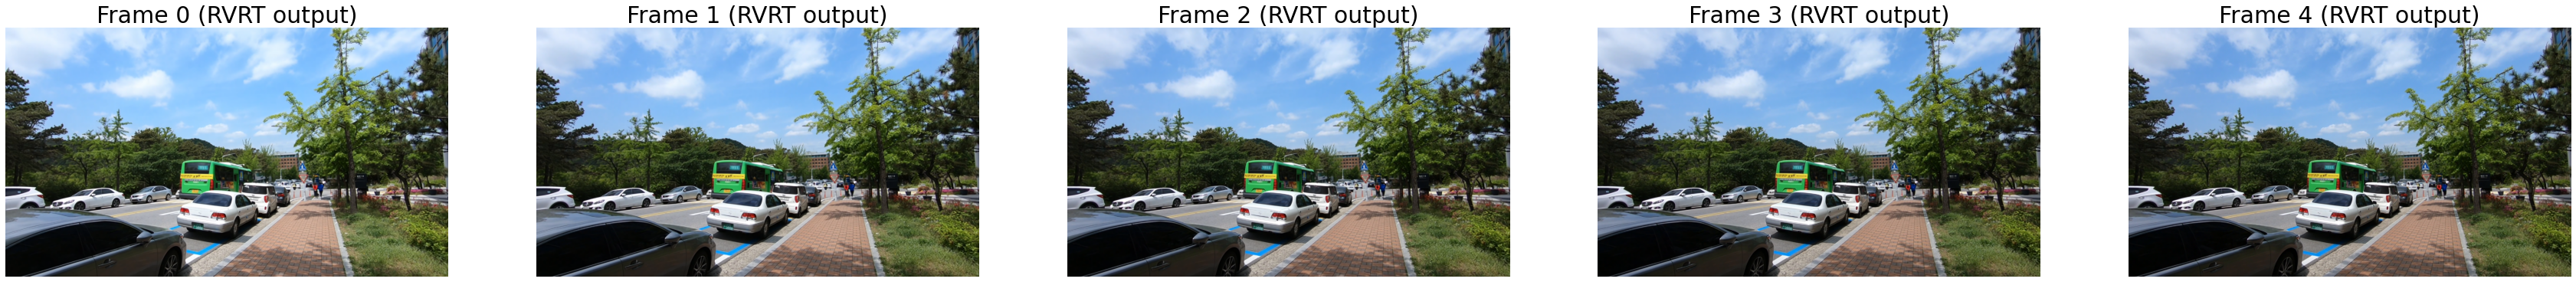

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def display(img1, name='input'):
  total_figs = 5
  fig = plt.figure(figsize=(total_figs*12, 14))
  ax1 = fig.add_subplot(1, total_figs, 1) 
  plt.title(f'Frame 0 ({name})', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title(f'Frame 1 ({name})', fontsize=30)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, total_figs, 3)
  plt.title(f'Frame 2 ({name})', fontsize=30)
  ax3.axis('off')
  ax4 = fig.add_subplot(1, total_figs, 4)
  plt.title(f'Frame 3 ({name})', fontsize=30)
  ax4.axis('off')
  ax5 = fig.add_subplot(1, total_figs, 5)
  plt.title(f'Frame 4 ({name})', fontsize=30)
  ax5.axis('off')
  ax1.imshow(img1[0])
  ax2.imshow(img1[1])
  ax3.imshow(img1[2])
  ax4.imshow(img1[3])
  ax5.imshow(img1[4])

# display video by frames
print(' Note: Due to Colab GPU memory limitation, we use smaller --tile here, which may lead to different performance from the paper. \n Please refer to https://github.com/JingyunLiang/RVRT#quick-testing for official arguments.\n')

img = []
for path in sorted(Path('testsets').rglob('*.png'))[:10]:
  img.append(cv2.cvtColor(cv2.imread(f'{path}'), cv2.COLOR_BGR2RGB))
display(img, 'input')
img = []
for path in sorted(Path('results').rglob('*.png'))[:10]:
  img.append(cv2.cvtColor(cv2.imread(f'{path}'), cv2.COLOR_BGR2RGB))
display(img, 'RVRT output')

# 5. Download Results


In [ ]:
# Download the results
!tar -czf RVRT_result.zip results/*
files.download(zip_filename)